# Himanshu Bairagi (22CE02010)

Assignment:2     CAD LAB                                
____________________________________________________________________________________________

# Problem 1

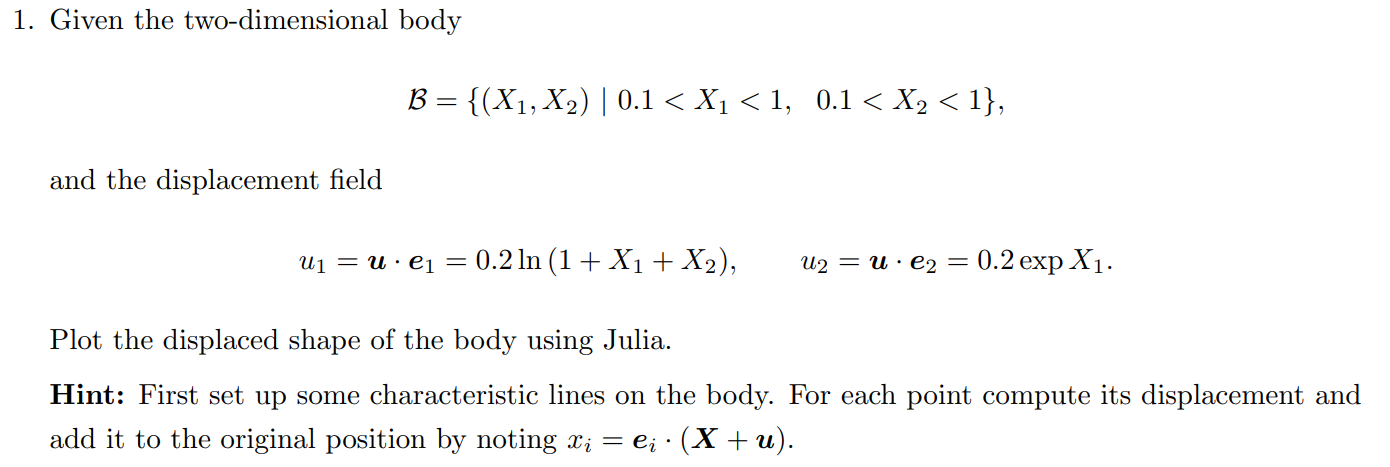

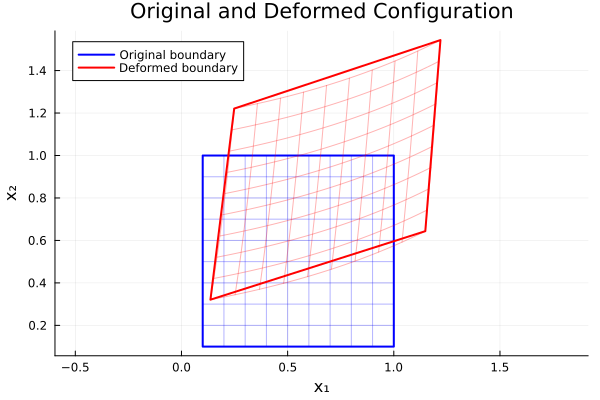

In [ ]:
using Plots

# Defining the displacement functions
function u1(X1, X2)
    return 0.2 * log(1 + X1 + X2)
end

function u2(X1, X2)
    return 0.2 * exp(X1)
end

# Defining the body domain
X1_min, X1_max = 0.1, 1.0
X2_min, X2_max = 0.1, 1.0

n_lines = 10  

# Horizontal lines (constant X2)
X2_lines = range(X2_min, X2_max, length=n_lines)
# Vertical lines (constant X1)
X1_lines = range(X1_min, X1_max, length=n_lines)

# Number of points along each line
n_points = 50

# Initializing plot
p = plot(legend=:topleft, aspect_ratio=:equal, 
         xlabel="x₁", ylabel="x₂",
         title="Original and Deformed Configuration")

# Ploting boundary of original configuration
X1_boundary = [X1_min, X1_max, X1_max, X1_min, X1_min]
X2_boundary = [X2_min, X2_min, X2_max, X2_max, X2_min]
plot!(p, X1_boundary, X2_boundary, 
      linewidth=2, color=:blue, label="Original boundary")

# Ploting horizontal characteristic lines (original configuration)
for X2_const in X2_lines
    X1_vals = range(X1_min, X1_max, length=n_points)
    X2_vals = fill(X2_const, n_points)
    plot!(p, X1_vals, X2_vals, color=:blue, alpha=0.3, label="")
end

# Ploting vertical characteristic lines (original configuration)
for X1_const in X1_lines
    X1_vals = fill(X1_const, n_points)
    X2_vals = range(X2_min, X2_max, length=n_points)
    plot!(p, X1_vals, X2_vals, color=:blue, alpha=0.3, label="")
end

# Computing and plotting deformed configuration
# Deformed boundary
x1_boundary_def = zeros(length(X1_boundary))
x2_boundary_def = zeros(length(X2_boundary))

for i in 1:length(X1_boundary)
    X1 = X1_boundary[i]
    X2 = X2_boundary[i]
    # x_i = X_i + u_i
    x1_boundary_def[i] = X1 + u1(X1, X2)
    x2_boundary_def[i] = X2 + u2(X1, X2)
end

plot!(p, x1_boundary_def, x2_boundary_def, 
      linewidth=2, color=:red, label="Deformed boundary")

# Plotting deformed horizontal characteristic lines
for X2_const in X2_lines
    X1_vals = range(X1_min, X1_max, length=n_points)
    X2_vals = fill(X2_const, n_points)
    
    x1_vals = zeros(n_points)
    x2_vals = zeros(n_points)
    
    for i in 1:n_points
        X1 = X1_vals[i]
        X2 = X2_vals[i]
        x1_vals[i] = X1 + u1(X1, X2)
        x2_vals[i] = X2 + u2(X1, X2)
    end
    
    plot!(p, x1_vals, x2_vals, color=:red, alpha=0.3, label="")
end

# Ploting deformed vertical characteristic lines
for X1_const in X1_lines
    X1_vals = fill(X1_const, n_points)
    X2_vals = range(X2_min, X2_max, length=n_points)
    
    x1_vals = zeros(n_points)
    x2_vals = zeros(n_points)
    
    for i in 1:n_points
        X1 = X1_vals[i]
        X2 = X2_vals[i]
        x1_vals[i] = X1 + u1(X1, X2)
        x2_vals[i] = X2 + u2(X1, X2)
    end
    
    plot!(p, x1_vals, x2_vals, color=:red, alpha=0.3, label="")
end
display(p)

# Problem 2

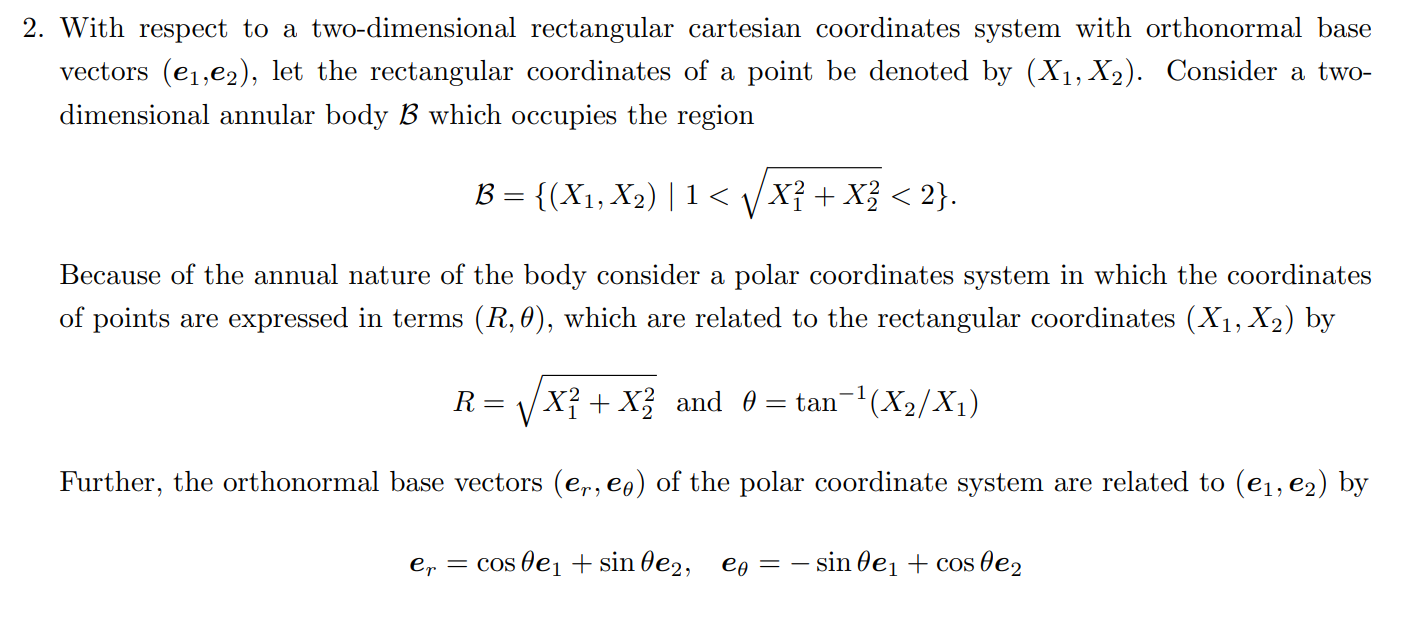
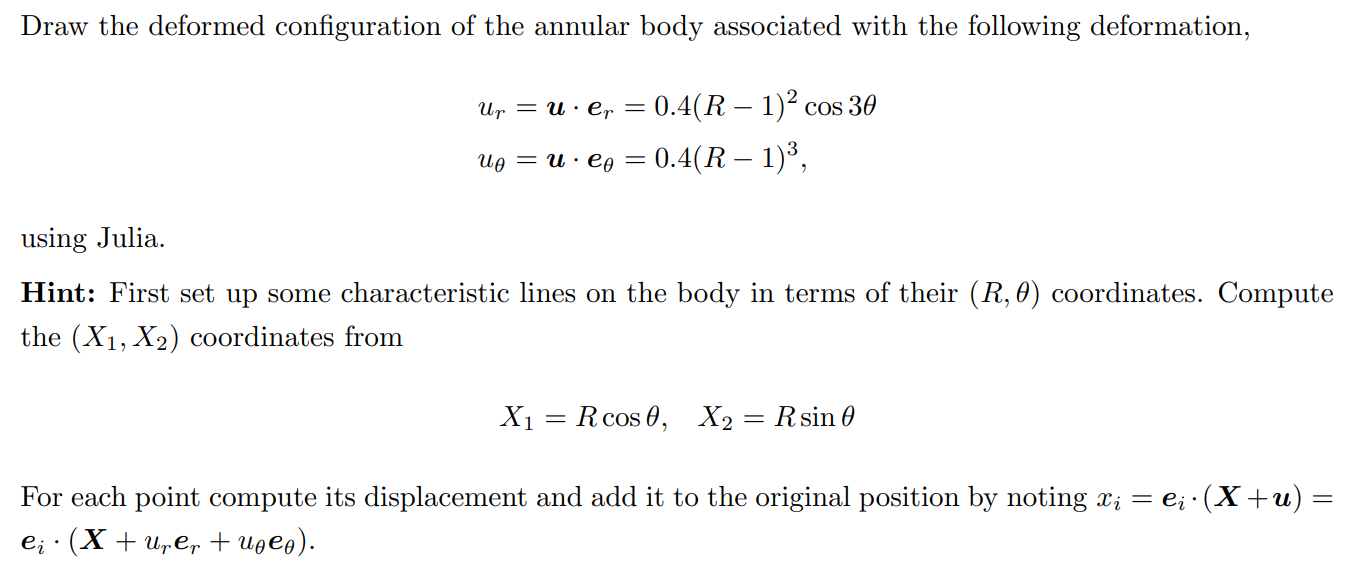

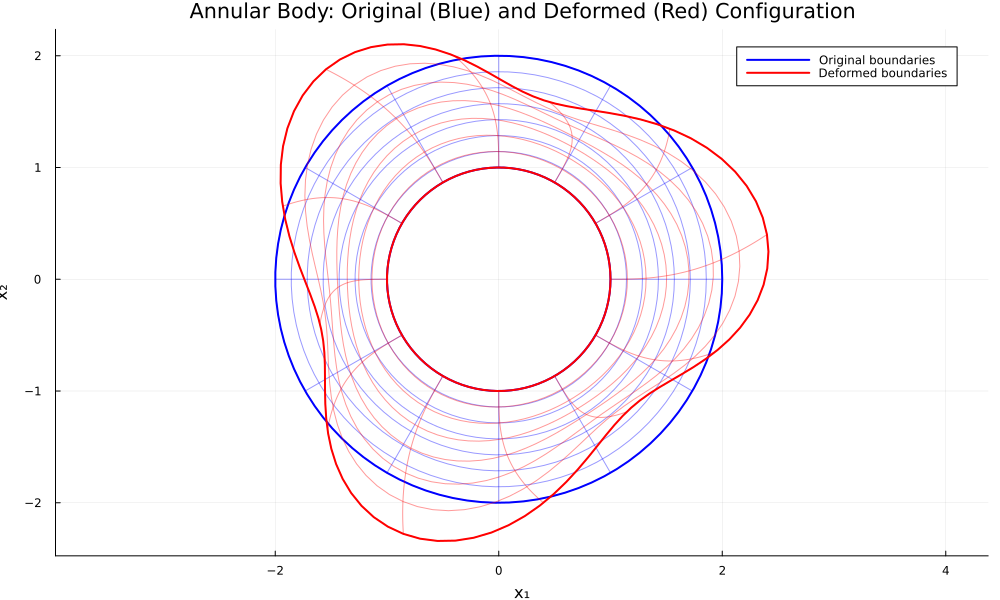

In [ ]:
using Plots

# Defining displacement functions in polar coordinates
function u_r(R, θ)
    return 0.4 * (R - 1)^2 * cos(3 * θ)
end

function u_θ(R, θ)
    return 0.4 * (R - 1)^3
end

# Converting polar to cartesian coordinates
function polar_to_cartesian(R, θ)
    X1 = R * cos(θ)
    X2 = R * sin(θ)
    return X1, X2
end

# Computing deformed position
function compute_deformed_position(R, θ)
    # Original position in cartesian coordinates
    X1, X2 = polar_to_cartesian(R, θ)
    
    # Displacement components in polar coordinates
    ur = u_r(R, θ)
    uθ = u_θ(R, θ)
    
    # Base vectors in polar coordinates
    e_r_1 = cos(θ)  # e_r · e_1
    e_r_2 = sin(θ)  # e_r · e_2
    e_θ_1 = -sin(θ) # e_θ · e_1
    e_θ_2 = cos(θ)  # e_θ · e_2
    
    # Displacement in cartesian coordinates
    # u = u_r * e_r + u_θ * e_θ
    u1 = ur * e_r_1 + uθ * e_θ_1
    u2 = ur * e_r_2 + uθ * e_θ_2
    
    # Deformed position: x = X + u
    x1 = X1 + u1
    x2 = X2 + u2
    
    return x1, x2
end

# Defining the annular body domain
R_inner = 1.0
R_outer = 2.0

# Creating characteristic lines
# Number of radial and circumferential lines
n_radial = 12      
n_circular = 8     
n_points = 100     

# Initializing plot
p = plot(aspect_ratio=:equal, legend=:topright,
         xlabel="x₁", ylabel="x₂",
         title="Annular Body: Original (Blue) and Deformed (Red) Configuration",size=(1000, 600))

# ===== PLOTTing ORIGINAL CONFIGURATION =====

# Plotting circular boundaries (inner and outer circles)
θ_range = range(0, 2π, length=n_points)

# Inner circle (R = 1)
X1_inner = [R_inner * cos(θ) for θ in θ_range]
X2_inner = [R_inner * sin(θ) for θ in θ_range]
plot!(p, X1_inner, X2_inner, color=:blue, linewidth=2, 
      label="Original boundaries")

# Outer circle (R = 2)
X1_outer = [R_outer * cos(θ) for θ in θ_range]
X2_outer = [R_outer * sin(θ) for θ in θ_range]
plot!(p, X1_outer, X2_outer, color=:blue, linewidth=2, label="")

# Plotting radial lines (constant θ)
for i in 1:n_radial
    θ_const = 2π * (i-1) / n_radial
    R_vals = range(R_inner, R_outer, length=n_points)
    
    X1_vals = [R * cos(θ_const) for R in R_vals]
    X2_vals = [R * sin(θ_const) for R in R_vals]
    
    plot!(p, X1_vals, X2_vals, color=:blue, alpha=0.4, label="")
end

# Plotting circular lines (constant R)
for i in 1:n_circular
    R_const = R_inner + (R_outer - R_inner) * (i-1) / (n_circular - 1)
    θ_vals = range(0, 2π, length=n_points)
    
    X1_vals = [R_const * cos(θ) for θ in θ_vals]
    X2_vals = [R_const * sin(θ) for θ in θ_vals]
    
    plot!(p, X1_vals, X2_vals, color=:blue, alpha=0.4, label="")
end

# ===== PLOT DEFORMED CONFIGURATION =====

# Plotting deformed circular boundaries
# Inner circle deformed
x1_inner_def = zeros(length(θ_range))
x2_inner_def = zeros(length(θ_range))
for (i, θ) in enumerate(θ_range)
    x1_inner_def[i], x2_inner_def[i] = compute_deformed_position(R_inner, θ)
end
plot!(p, x1_inner_def, x2_inner_def, color=:red, linewidth=2,
      label="Deformed boundaries")

# Outer circle deformed
x1_outer_def = zeros(length(θ_range))
x2_outer_def = zeros(length(θ_range))
for (i, θ) in enumerate(θ_range)
    x1_outer_def[i], x2_outer_def[i] = compute_deformed_position(R_outer, θ)
end
plot!(p, x1_outer_def, x2_outer_def, color=:red, linewidth=2, label="")

# Plot deformed radial lines (constant θ)
for i in 1:n_radial
    θ_const = 2π * (i-1) / n_radial
    R_vals = range(R_inner, R_outer, length=n_points)
    
    x1_vals = zeros(length(R_vals))
    x2_vals = zeros(length(R_vals))
    
    for (j, R) in enumerate(R_vals)
        x1_vals[j], x2_vals[j] = compute_deformed_position(R, θ_const)
    end
    
    plot!(p, x1_vals, x2_vals, color=:red, alpha=0.4, label="")
end

# Plot deformed circular lines (constant R)
for i in 1:n_circular
    R_const = R_inner + (R_outer - R_inner) * (i-1) / (n_circular - 1)
    θ_vals = range(0, 2π, length=n_points)
    
    x1_vals = zeros(length(θ_vals))
    x2_vals = zeros(length(θ_vals))
    
    for (j, θ) in enumerate(θ_vals)
        x1_vals[j], x2_vals[j] = compute_deformed_position(R_const, θ)
    end
    
    plot!(p, x1_vals, x2_vals, color=:red, alpha=0.4, label="")
end
display(p)

# Problem 3

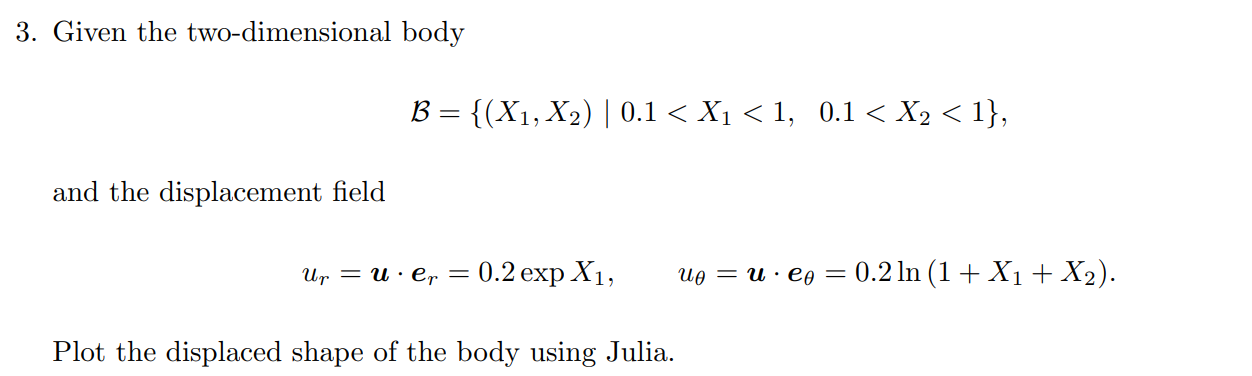

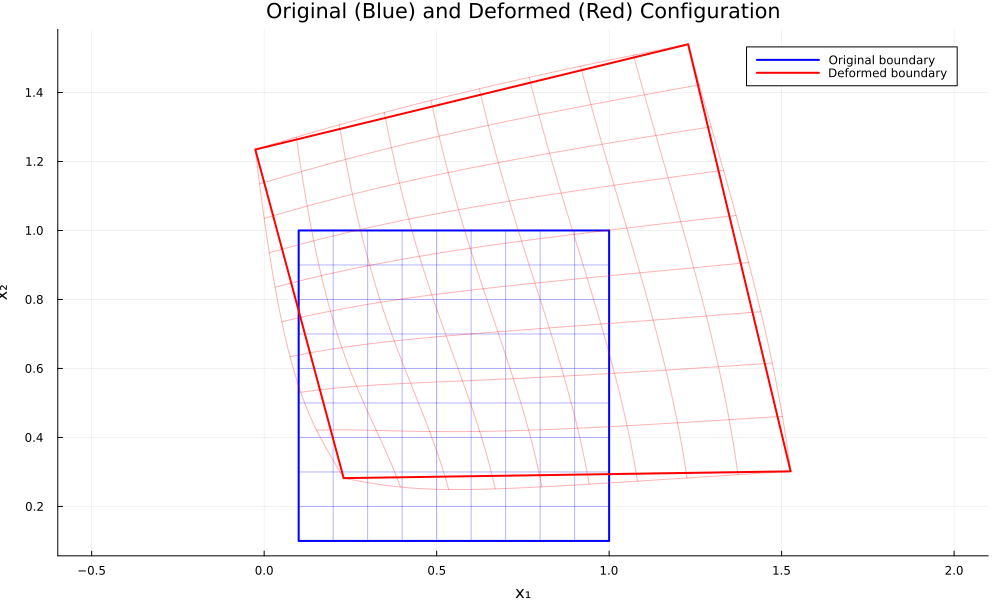

In [ ]:
using Plots


function u_r(X1, X2)
    return 0.2 * exp(X1)
end

function u_θ(X1, X2)
    return 0.2 * log(1 + X1 + X2)
end

# Compute polar angle θ from Cartesian coordinates
function compute_theta(X1, X2)
    return atan(X2, X1)  # atan(y, x) gives correct quadrant
end

# Compute deformed position
function compute_deformed_position(X1, X2)
    # Calculate polar angle at this point
    θ = compute_theta(X1, X2)
    
    # Displacement components in polar basis
    ur = u_r(X1, X2)
    uθ = u_θ(X1, X2)
    
    # Polar base vectors at this point
    # e_r = cos(θ)e_1 + sin(θ)e_2
    # e_θ = -sin(θ)e_1 + cos(θ)e_2
    e_r_1 = cos(θ)
    e_r_2 = sin(θ)
    e_θ_1 = -sin(θ)
    e_θ_2 = cos(θ)
    
    # Converting displacement to Cartesian components
    # u = u_r * e_r + u_θ * e_θ
    u1 = ur * e_r_1 + uθ * e_θ_1
    u2 = ur * e_r_2 + uθ * e_θ_2
    
    # Deformed position: x = X + u
    x1 = X1 + u1
    x2 = X2 + u2
    
    return x1, x2
end

# Define the body domain
X1_min, X1_max = 0.1, 1.0
X2_min, X2_max = 0.1, 1.0

# Create characteristic lines on the body
n_lines = 10      # Number of lines in each direction
n_points = 50     # Points along each line

# Horizontal lines (constant X2)
X2_lines = range(X2_min, X2_max, length=n_lines)
# Vertical lines (constant X1)
X1_lines = range(X1_min, X1_max, length=n_lines)

# Initialize plot
p = plot(aspect_ratio=:equal, legend=:topright,
         xlabel="x₁", ylabel="x₂",
         title="Original (Blue) and Deformed (Red) Configuration",size=(1000, 600))

# ===== PLOT ORIGINAL CONFIGURATION =====

# Plot boundary of original configuration
X1_boundary = [X1_min, X1_max, X1_max, X1_min, X1_min]
X2_boundary = [X2_min, X2_min, X2_max, X2_max, X2_min]
plot!(p, X1_boundary, X2_boundary, 
      linewidth=2, color=:blue, label="Original boundary")

# Plot horizontal characteristic lines (constant X2)
for X2_const in X2_lines
    X1_vals = range(X1_min, X1_max, length=n_points)
    X2_vals = fill(X2_const, n_points)
    plot!(p, X1_vals, X2_vals, color=:blue, alpha=0.3, label="")
end

# Plot vertical characteristic lines (constant X1)
for X1_const in X1_lines
    X1_vals = fill(X1_const, n_points)
    X2_vals = range(X2_min, X2_max, length=n_points)
    plot!(p, X1_vals, X2_vals, color=:blue, alpha=0.3, label="")
end

# ===== PLOT DEFORMED CONFIGURATION =====

# Deformed boundary
x1_boundary_def = zeros(length(X1_boundary))
x2_boundary_def = zeros(length(X2_boundary))

for i in 1:length(X1_boundary)
    X1 = X1_boundary[i]
    X2 = X2_boundary[i]
    x1_boundary_def[i], x2_boundary_def[i] = compute_deformed_position(X1, X2)
end

plot!(p, x1_boundary_def, x2_boundary_def, 
      linewidth=2, color=:red, label="Deformed boundary")

# Plot deformed horizontal characteristic lines (constant X2)
for X2_const in X2_lines
    X1_vals = range(X1_min, X1_max, length=n_points)
    X2_vals = fill(X2_const, n_points)
    
    x1_vals = zeros(n_points)
    x2_vals = zeros(n_points)
    
    for i in 1:n_points
        X1 = X1_vals[i]
        X2 = X2_vals[i]
        x1_vals[i], x2_vals[i] = compute_deformed_position(X1, X2)
    end
    
    plot!(p, x1_vals, x2_vals, color=:red, alpha=0.3, label="")
end

# Plot deformed vertical characteristic lines (constant X1)
for X1_const in X1_lines
    X1_vals = fill(X1_const, n_points)
    X2_vals = range(X2_min, X2_max, length=n_points)
    
    x1_vals = zeros(n_points)
    x2_vals = zeros(n_points)
    
    for i in 1:n_points
        X1 = X1_vals[i]
        X2 = X2_vals[i]
        x1_vals[i], x2_vals[i] = compute_deformed_position(X1, X2)
    end
    
    plot!(p, x1_vals, x2_vals, color=:red, alpha=0.3, label="")
end

display(p)


# Problem 4

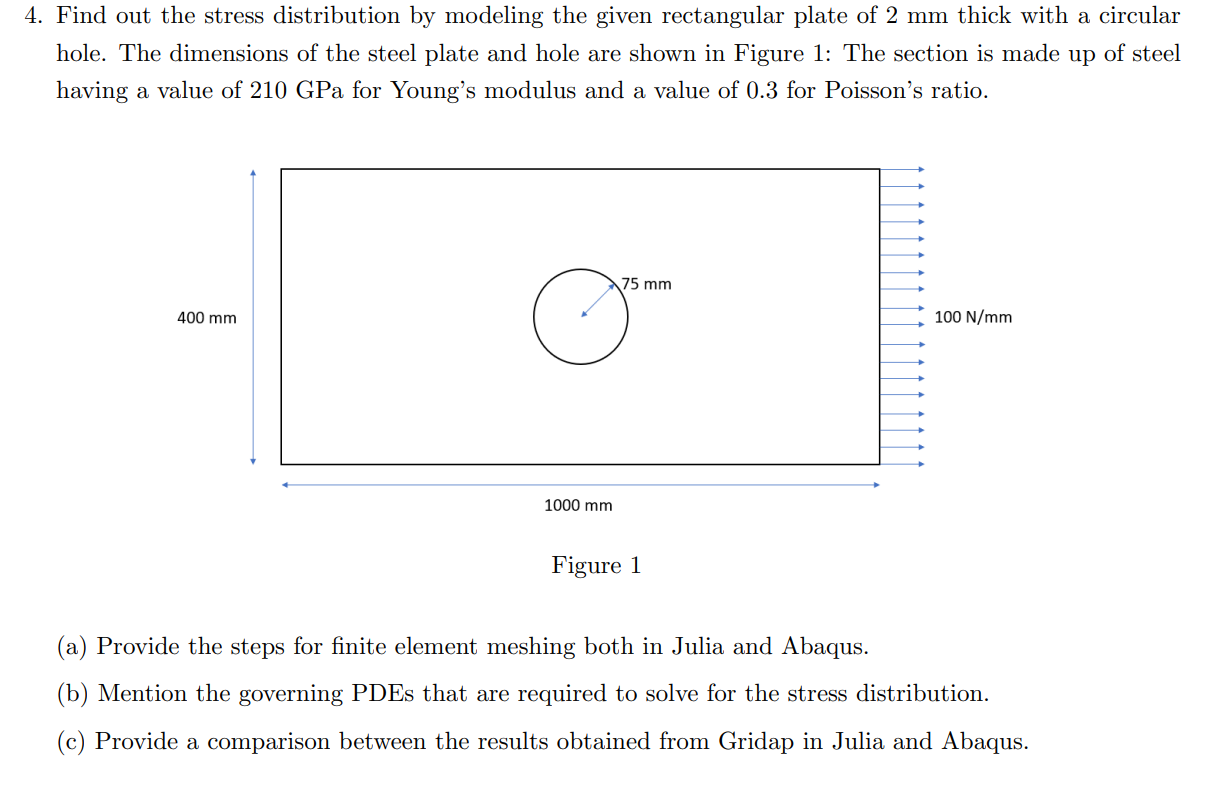

In [ ]:
using Gmsh: gmsh

function create_plate_with_hole_mesh()
    # Initialize Gmsh
    gmsh.initialize()
    gmsh.model.add("plate_with_hole")

    # Plate dimensions (in mm)
    plate_length = 1000.0   
    plate_width = 400.0   
    plate_thickness = 2.0  
    # Hole parameters
    hole_radius = 75.0      # Radius of circular hole
    hole_center_x = 500.0   # X-coordinate of hole center (middle of plate)
    hole_center_y = 200.0    # Y-coordinate of hole center (middle of plate)

    # Mesh size parameters      
    lc = 30.0  # Characteristic length for mesh size (coarse)
    lc_hole = 15.0  # Finer mesh around the hole
    
    # Outer rectangle corner points
    p1 = gmsh.model.geo.addPoint(0.0, 0.0, 0.0, lc)
    p2 = gmsh.model.geo.addPoint(plate_length, 0.0, 0.0, lc)
    p3 = gmsh.model.geo.addPoint(plate_length, plate_width, 0.0, lc)
    p4 = gmsh.model.geo.addPoint(0.0, plate_width, 0.0, lc)
    
    # Hole center and points on the circle
    p_center = gmsh.model.geo.addPoint(hole_center_x, hole_center_y, 0.0, lc_hole)
    
    # Points on the hole circumference (4 cardinal points for circle definition)
    p_hole_right = gmsh.model.geo.addPoint(hole_center_x + hole_radius, hole_center_y, 0.0, lc_hole)
    p_hole_top = gmsh.model.geo.addPoint(hole_center_x, hole_center_y + hole_radius, 0.0, lc_hole)
    p_hole_left = gmsh.model.geo.addPoint(hole_center_x - hole_radius, hole_center_y, 0.0, lc_hole)
    p_hole_bottom = gmsh.model.geo.addPoint(hole_center_x, hole_center_y - hole_radius, 0.0, lc_hole)
    
    # Outer rectangle lines
    l1 = gmsh.model.geo.addLine(p1, p2)  # Bottom edge
    l2 = gmsh.model.geo.addLine(p2, p3)  # Right edge 
    l3 = gmsh.model.geo.addLine(p3, p4)  # Top edge
    l4 = gmsh.model.geo.addLine(p4, p1)  # Left edge 
    
    # Circular hole arcs (4 quarter circles)
    c1 = gmsh.model.geo.addCircleArc(p_hole_right, p_center, p_hole_top)
    c2 = gmsh.model.geo.addCircleArc(p_hole_top, p_center, p_hole_left)
    c3 = gmsh.model.geo.addCircleArc(p_hole_left, p_center, p_hole_bottom)
    c4 = gmsh.model.geo.addCircleArc(p_hole_bottom, p_center, p_hole_right)
    
    # Outer boundary curve loop
    outer_loop = gmsh.model.geo.addCurveLoop([l1, l2, l3, l4])
    
    # Hole boundary curve loop (interior, to be subtracted)
    hole_loop = gmsh.model.geo.addCurveLoop([c1, c2, c3, c4])
    
    plate_surface = gmsh.model.geo.addPlaneSurface([outer_loop, hole_loop])
    
    # Physical surface (the domain)
    gmsh.model.geo.synchronize()
    gmsh.model.addPhysicalGroup(2, [plate_surface], -1, "Plate")
    
    # Physical lines for boundary conditions
    gmsh.model.addPhysicalGroup(1, [l4], -1, "LeftEdge_Fixed")      # Left edge (fixed)
    gmsh.model.addPhysicalGroup(1, [l2], -1, "RightEdge_Load")      # Right edge (load)
    gmsh.model.addPhysicalGroup(1, [l1], -1, "BottomEdge")          # Bottom edge
    gmsh.model.addPhysicalGroup(1, [l3], -1, "TopEdge")             # Top edge
    gmsh.model.addPhysicalGroup(1, [c1, c2, c3, c4], -1, "Hole")    # Hole boundary
    
    gmsh.model.geo.synchronize()
    
    gmsh.model.mesh.generate(2)
    gmsh.model.mesh.refine()

    gmsh.write("plate_with_hole.msh")
    gmsh.write("plate_with_hole.vtk")
    gmsh.fltk.run()
    gmsh.finalize()

    return nothing
end
create_plate_with_hole_mesh()

# Result using Gmsh

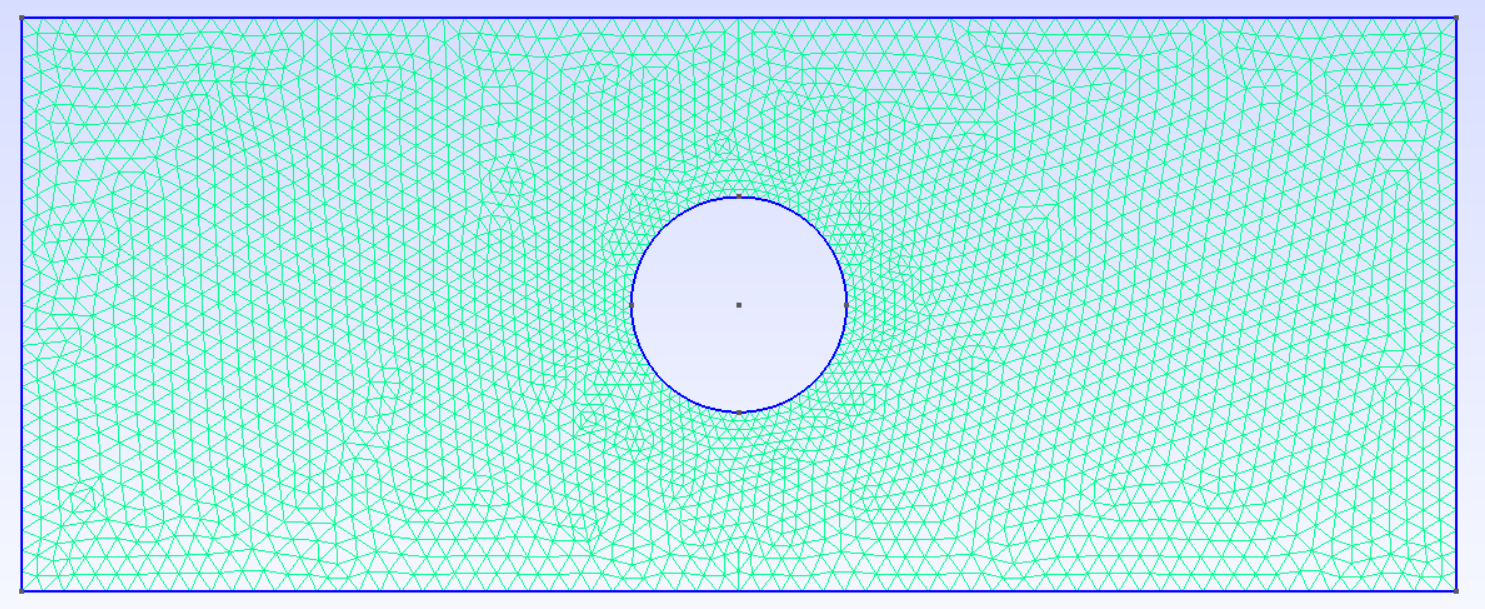

# Question 5

In [ ]:
using Gmsh: gmsh    

L, W, H = 1.0, 0.25, 0.2
h = 0.02   
gmsh.initialize()
gmsh.model.add("cantilever with point load")

# Corner points
p1 = gmsh.model.geo.addPoint(0, 0, 0, h)
p2 = gmsh.model.geo.addPoint(L, 0, 0, h)
p3 = gmsh.model.geo.addPoint(L, W, 0, h)
p4 = gmsh.model.geo.addPoint(0, W, 0, h)

# Bottom lines
l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p1)

# Bottom surface
cl = gmsh.model.geo.addCurveLoop([l1, l2, l3, l4])
s = gmsh.model.geo.addPlaneSurface([cl])

# Proper extrusion → this creates a solid
vol = gmsh.model.geo.extrude([(2, s)], 0, 0, H)

gmsh.model.geo.synchronize()

gmsh.model.mesh.generate(3)
gmsh.write("cantilever_with_point_load.msh")

gmsh.fltk.run()
gmsh.finalize()


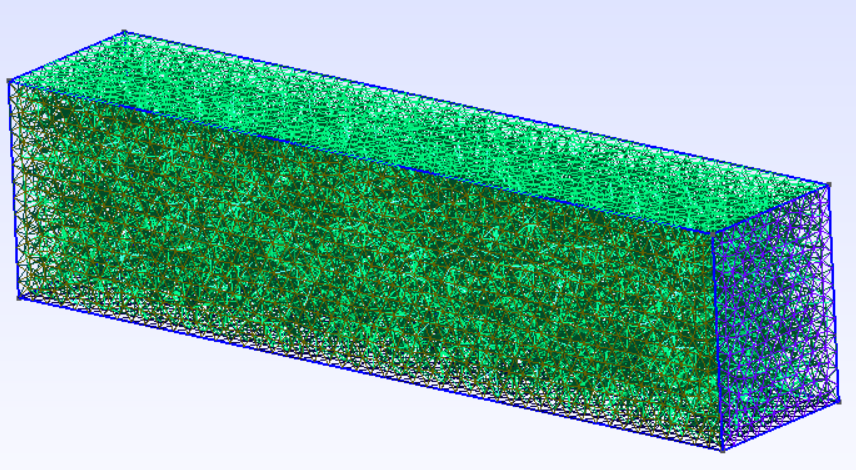
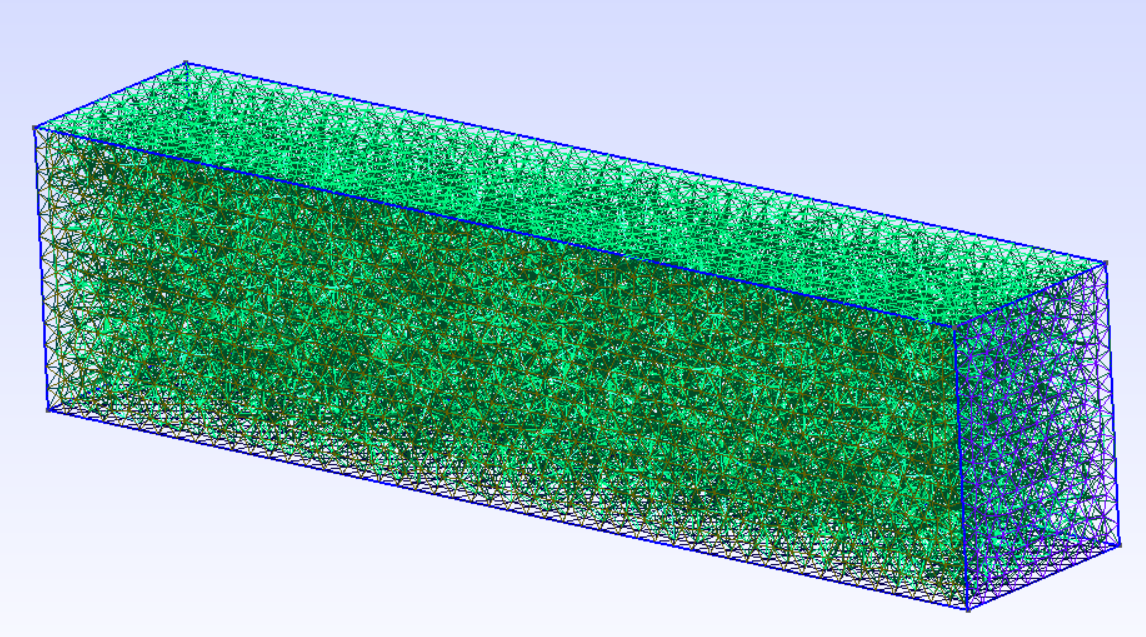

# Question 6

In [ ]:
using Gmsh: gmsh    

L, W, H = 1.0, 0.25, 0.2
h = 0.05  
gmsh.initialize()
gmsh.model.add("cantilever with UDL load")

# Corner points
p1 = gmsh.model.geo.addPoint(0, 0, 0, h)
p2 = gmsh.model.geo.addPoint(L, 0, 0, h)
p3 = gmsh.model.geo.addPoint(L, W, 0, h)
p4 = gmsh.model.geo.addPoint(0, W, 0, h)

# Bottom lines
l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p1)

# Bottom surface
cl = gmsh.model.geo.addCurveLoop([l1, l2, l3, l4])
s = gmsh.model.geo.addPlaneSurface([cl])

# Proper extrusion → this creates a solid
vol = gmsh.model.geo.extrude([(2, s)], 0, 0, H)

gmsh.model.geo.synchronize()

gmsh.model.mesh.generate(3)
gmsh.write("cantilever_with_UDL_load.msh")

gmsh.fltk.run()
gmsh.finalize()


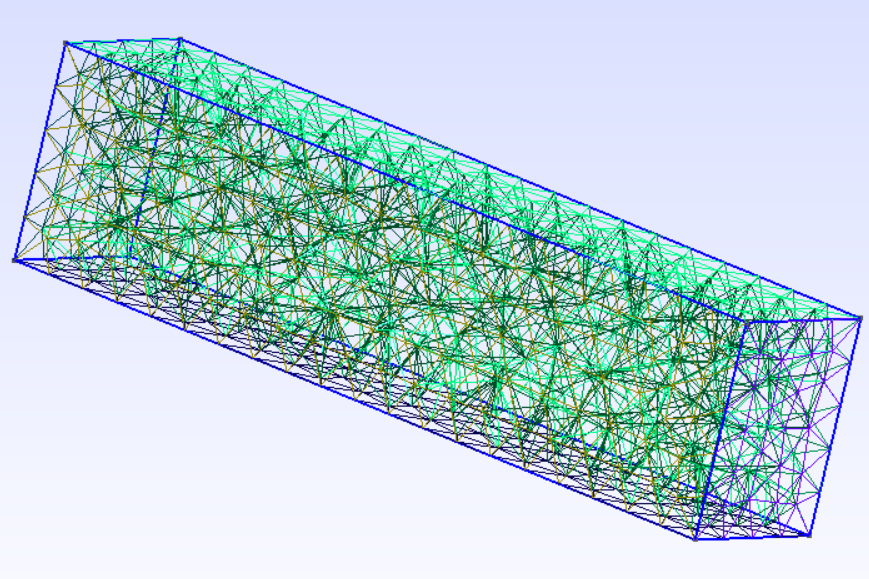